In [319]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score

## Read Data

In [320]:
# data_name = "dummy"
data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,1,0,0,1,0,0,1,13,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,1,0,1,1,0,1,0,0,25,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,0,1,0,1,0,1,0,0,26,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,0,1,0,1,0,1,0,0,25,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,1,1,0,1,0,1,0,0,61,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Train-Test Splitting

In [321]:
X= df_copy.iloc[:,:-1]
X

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,0,1,0,0,1,13,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,0,1,1,0,1,0,0,25,...,1,1,1,5,3,1,4,1,1,6.0
2,1,0,1,0,1,0,1,0,0,26,...,5,5,4,3,4,4,4,5,0,0.0
3,1,0,1,0,1,0,1,0,0,25,...,2,2,2,5,3,1,4,2,11,9.0
4,0,1,1,0,1,0,1,0,0,61,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,1,0,1,1,0,1,0,0,34,...,4,4,3,2,4,4,5,4,0,0.0
129483,0,1,1,0,1,0,1,0,0,23,...,4,4,4,5,5,5,5,4,0,0.0
129484,1,0,1,0,0,1,0,1,0,17,...,2,2,4,3,4,5,4,2,0,0.0
129485,0,1,1,0,1,0,1,0,0,14,...,4,4,3,2,5,4,5,4,0,0.0


In [322]:
y = df_copy.iloc[:,-1]
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
129482    neutral or dissatisfied
129483                  satisfied
129484    neutral or dissatisfied
129485                  satisfied
129486    neutral or dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [323]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (90640, 27) and test set is :(38847, 27)


In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[ 0.98488909, -0.98488909,  0.47343109, ..., -0.97939185,
         1.04110417,  0.98439561],
       [ 0.98488909, -0.98488909,  0.47343109, ...,  0.54468389,
        -0.39052142, -0.29022307],
       [ 0.98488909, -0.98488909,  0.47343109, ..., -0.97939185,
         0.71696252,  0.77195916],
       ...,
       [ 0.98488909, -0.98488909,  0.47343109, ..., -0.21735398,
         0.28477367, -0.05123207],
       [ 0.98488909, -0.98488909,  0.47343109, ..., -0.97939185,
        -0.39052142, -0.3964413 ],
       [-1.01534275,  1.01534275,  0.47343109, ..., -0.97939185,
        -0.39052142, -0.3964413 ]])

## Set paramiter CV

In [325]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.288930 วินาที


In [327]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 87.29 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     22029
              satisfied       0.87      0.84      0.85     16818

               accuracy                           0.87     38847
              macro avg       0.87      0.87      0.87     38847
           weighted avg       0.87      0.87      0.87     38847



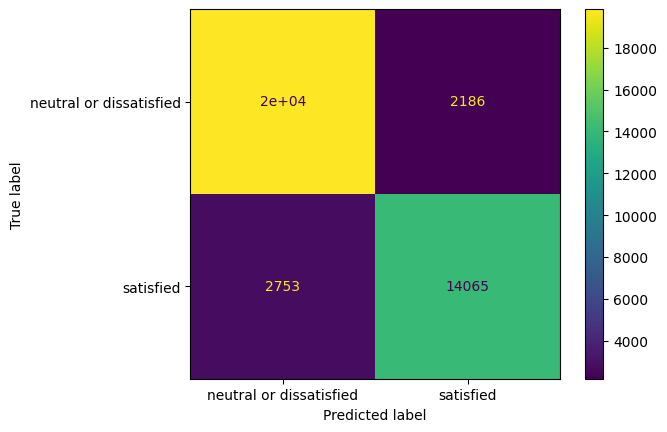

In [328]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

In [329]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")

Cross Validation Scores (Logistic Regression): [0.8755585  0.8661261  0.87671686 0.86976667 0.87456561 0.87456561
 0.87224888 0.87158696 0.88184676 0.8806884  0.87421384 0.87537239
 0.87735849 0.87669646 0.87636544]
Mean CV Accuracy: 0.8749
Standard Deviation CV Accuracy: 0.0038
เวลาที่ใช้ในการทำ Cross Validation: 3.050446 วินาที


In [330]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.874757281553398
Test Accuracy: 0.8728601951244627


## K-NN(K Nearest Neighbours)

In [331]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.070421 วินาที


In [332]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 92.66 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.96      0.94     22029
              satisfied       0.95      0.88      0.91     16818

               accuracy                           0.93     38847
              macro avg       0.93      0.92      0.92     38847
           weighted avg       0.93      0.93      0.93     38847



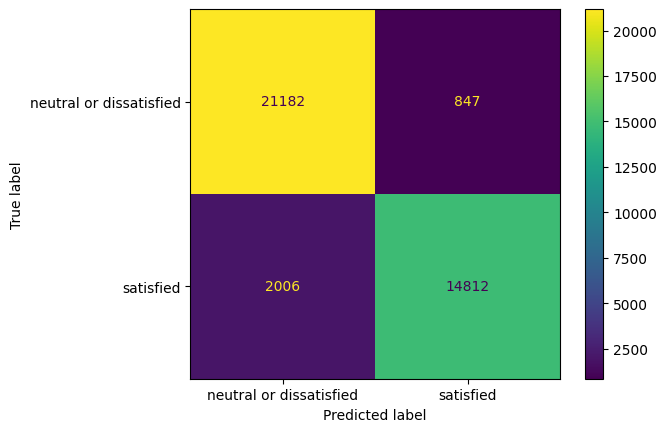

In [333]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [334]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.92867781 0.92553368 0.92900877 0.92503723 0.927023   0.92354791
 0.92338243 0.92917425 0.93198742 0.92983617 0.9225422  0.93346574
 0.93032109 0.92717643 0.9285005 ]
Mean CV Accuracy: 0.9277
Standard Deviation CV Accuracy: 0.0031
เวลาที่ใช้ในการทำ Cross Validation: 6.628114 วินาที


In [335]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9490842894969108
Test Accuracy: 0.9265580353695266


In [336]:
import pickle
pickle_out = open("../model/model_knn.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

## Naive-Bayes

In [337]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train_scaled, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.311238 วินาที


In [338]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test_scaled)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 77.0 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.81      0.78      0.79     22029
              satisfied       0.72      0.76      0.74     16818

               accuracy                           0.77     38847
              macro avg       0.77      0.77      0.77     38847
           weighted avg       0.77      0.77      0.77     38847



In [339]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")

Cross Validation Scores (Naive Bayes): [0.77114016 0.76170776 0.76965084 0.76551382 0.75608142 0.76832699
 0.76402449 0.77362237 0.7699818  0.76931987 0.77672956 0.76564052
 0.77722608 0.7633234  0.76679907]
Mean CV Accuracy: 0.7679
Standard Deviation CV Accuracy: 0.0054
เวลาที่ใช้ในการทำ Cross Validation: 3.051946 วินาที


## Decision Tree

In [340]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")



เวลาที่ใช้ในการฝึกโมเดล: 0.174298 วินาที


In [341]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 94.21 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     22029
              satisfied       0.93      0.94      0.93     16818

               accuracy                           0.94     38847
              macro avg       0.94      0.94      0.94     38847
           weighted avg       0.94      0.94      0.94     38847



In [342]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")

Cross Validation Scores (Decision Tree): [0.94257819 0.94539136 0.93529704 0.93777925 0.93463512 0.93860665
 0.93662088 0.93529704 0.94324011 0.93711733 0.93230718 0.93843098
 0.9409136  0.93776895 0.94306521]
Mean CV Accuracy: 0.9386
Standard Deviation CV Accuracy: 0.0036
เวลาที่ใช้ในการทำ Cross Validation: 3.056148 วินาที


In [343]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.942080469534327


## สรูป

In [344]:
print("-"*30,"สรูป","-"*30)

print("-"*65)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")
# print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

print("-"*65)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")
# print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

print("-"*65)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")
# print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

print("-"*65)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")
# print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")


------------------------------ สรูป ------------------------------
-----------------------------------------------------------------
Accuracy of Logistic Regression is : 87.29 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.288930 วินาที
Mean CV Accuracy: 0.8749
Standard Deviation CV Accuracy: 0.0038
-----------------------------------------------------------------
Accuracy of Knn is : 92.66 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.070421 วินาที
Mean CV Accuracy: 0.9277
Standard Deviation CV Accuracy: 0.0031
-----------------------------------------------------------------
Accuracy of Naive Bayes is : 77.0 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.311238 วินาที
Mean CV Accuracy: 0.7679
Standard Deviation CV Accuracy: 0.0054
-----------------------------------------------------------------
Accuracy of Decision Tree is : 94.21 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.174298 วินาที
Mean CV Accuracy: 0.9386
Standard Deviation CV Accuracy: 0.0036


In [345]:
name = f"สรุป {data_name}".center(65)  # จัดให้ name อยู่ตรงกลางในความกว้าง 65 ตัวอักษร
line = "-" * 65
# Prepare data as a string
results = """
{}
{}
{}
Accuracy of Logistic Regression is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of KNN is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Naive Bayes is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Decision Tree is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
""".format(line, name, line,
    round(accuracy_LR*100, 2), training_time_LR, np.mean(cv_scores_lr), np.std(cv_scores_lr),
    round(accuracy_KNN*100, 2), training_time_KNN, np.mean(cv_scores_knn), np.std(cv_scores_knn),
    round(accuracy_NB*100, 2), training_time_NB, np.mean(cv_scores_nb), np.std(cv_scores_nb),
    round(accuracy_DT*100, 2), training_time_DT, np.mean(cv_scores_dt), np.std(cv_scores_dt)
)

# Write the data to a text file
with open(f'model_performance_{data_name}.txt', mode='w', encoding='utf-8') as file:
    file.write(results)

print("Results have been written to model_performance.txt")


Results have been written to model_performance.txt


 ## FULL Model

In [346]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler_full = StandardScaler()

X = scaler_full.fit_transform(X)
X

array([[-1.01493148,  1.01493148,  0.47349456, ...,  1.30462366,
         0.2730259 ,  0.07562286],
       [-1.01493148,  1.01493148, -2.11195667, ..., -1.74039966,
        -0.35967326, -0.236345  ],
       [ 0.98528819, -0.98528819,  0.47349456, ...,  1.30462366,
        -0.38603572, -0.39232892],
       ...,
       [ 0.98528819, -0.98528819,  0.47349456, ..., -0.97914383,
        -0.38603572, -0.39232892],
       [-1.01493148,  1.01493148,  0.47349456, ...,  0.54336783,
        -0.38603572, -0.39232892],
       [ 0.98528819, -0.98528819,  0.47349456, ..., -1.74039966,
        -0.38603572, -0.39232892]])

In [347]:
model_knn_FULL=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn_FULL.fit(X,y)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.434517 วินาที


In [348]:
cv_scores_KNN_FULL = cross_val_score(model_knn_FULL, X, y, cv=k_folds, scoring='accuracy')

print(f"Cross Validation Scores (KNN): {cv_scores_KNN_FULL}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_KNN_FULL):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_KNN_FULL):.4f}")

Cross Validation Scores (KNN): [0.92609753 0.92690837 0.92841422 0.92980424 0.92910923 0.93096259
 0.92922507 0.92655236 0.92910102 0.92655236 0.93083874 0.93535681
 0.9271316  0.92944856 0.93141798]
Mean CV Accuracy: 0.9291
Standard Deviation CV Accuracy: 0.0023


## Export model and Pipeline

In [349]:
import pickle
pickle_out = open("../model/model_knn_FULL.pkl", mode = "wb")
pickle.dump(model_knn_FULL, pickle_out)
pickle_out.close()

In [350]:
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [351]:
import pickle

data_name = "dummy_object"

df_t = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
102711,0,1,1,0,1,0,1,0,0,56,...,4,4,4,4,5,4,4,0,0.0,satisfied
48895,0,1,1,0,0,1,0,1,0,10,...,1,3,4,5,3,5,1,7,0.0,satisfied
10747,0,1,1,0,1,0,1,0,0,42,...,4,4,4,4,5,4,5,0,0.0,satisfied
8465,1,0,1,0,0,1,0,1,0,63,...,1,1,3,1,5,1,3,0,0.0,neutral or dissatisfied
64968,0,1,1,0,1,0,1,0,0,43,...,4,4,4,4,5,4,5,2,0.0,satisfied
97293,0,1,1,0,1,0,1,0,0,42,...,4,4,4,4,3,4,5,0,17.0,satisfied
69825,0,1,1,0,0,1,0,1,0,13,...,5,5,2,1,3,2,5,8,5.0,neutral or dissatisfied
7353,0,1,1,0,1,0,1,0,0,37,...,5,5,5,5,3,5,4,0,0.0,satisfied
48755,0,1,0,1,1,0,0,1,0,31,...,4,2,2,4,4,3,4,0,3.0,neutral or dissatisfied
41961,1,0,0,1,1,0,0,1,0,27,...,2,4,4,3,1,4,2,1,0.0,neutral or dissatisfied


In [352]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
102711,0,1,1,0,1,0,1,0,0,56,...,4,4,4,4,4,5,4,4,0,0.0
48895,0,1,1,0,0,1,0,1,0,10,...,5,1,3,4,5,3,5,1,7,0.0
10747,0,1,1,0,1,0,1,0,0,42,...,5,4,4,4,4,5,4,5,0,0.0
8465,1,0,1,0,0,1,0,1,0,63,...,4,1,1,3,1,5,1,3,0,0.0
64968,0,1,1,0,1,0,1,0,0,43,...,5,4,4,4,4,5,4,5,2,0.0
97293,0,1,1,0,1,0,1,0,0,42,...,5,4,4,4,4,3,4,5,0,17.0
69825,0,1,1,0,0,1,0,1,0,13,...,5,5,5,2,1,3,2,5,8,5.0
7353,0,1,1,0,1,0,1,0,0,37,...,4,5,5,5,5,3,5,4,0,0.0
48755,0,1,0,1,1,0,0,1,0,31,...,4,4,2,2,4,4,3,4,0,3.0
41961,1,0,0,1,1,0,0,1,0,27,...,2,2,4,4,3,1,4,2,1,0.0


In [353]:
y_sam = df_sam.iloc[:,-1]
y_sam


102711                  satisfied
48895                   satisfied
10747                   satisfied
8465      neutral or dissatisfied
64968                   satisfied
97293                   satisfied
69825     neutral or dissatisfied
7353                    satisfied
48755     neutral or dissatisfied
41961     neutral or dissatisfied
87380                   satisfied
64854                   satisfied
7026                    satisfied
112838                  satisfied
2354                    satisfied
84027     neutral or dissatisfied
68408     neutral or dissatisfied
6645      neutral or dissatisfied
102461    neutral or dissatisfied
24510     neutral or dissatisfied
Name: satisfaction, dtype: object

In [354]:
model = pickle.load(open("../model/model_knn.pkl", 'rb'))
scaler_1 = pickle.load(open("../model/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

Accuracy of Knn is : 55.0 % .


/Users/thanabodinkeawmaha/Desktop/Data_sci/AeroPulse/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
